# Lab | Unsupervised learning intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm as tqdm
import time
import seaborn as sns

# Select data and split:

In [2]:
df = pd.read_csv("spotify_data.csv")

<IPython.core.display.Javascript object>

In [3]:
dfeatures = df.select_dtypes(include='number')

In [4]:
dfeatures.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.534,0.725,1.0,-3.906,1.0,0.0460,0.0910,0.000000,0.0264,0.550,88.098,225149.0,4.0
1,1,0.788,0.859,2.0,-2.724,1.0,0.0856,0.2810,0.000000,0.0424,0.822,141.020,207853.0,4.0
2,2,0.796,0.798,1.0,-6.312,1.0,0.0317,0.0340,0.000042,0.0952,0.942,116.032,202735.0,4.0
3,3,0.591,0.764,1.0,-5.484,1.0,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0,4.0
4,4,0.604,0.366,5.0,-7.519,1.0,0.0282,0.5780,0.000000,0.1330,0.130,141.981,224695.0,4.0


In [5]:
# I noticed I had 1 row with NaN values so Im dropping it. I will also drop a "Unnamed" column (wich is just a duplicated index)
dfeatures = dfeatures.dropna()
dfeatures = dfeatures.drop(["Unnamed: 0"], axis= 1)

In [6]:
dfeatures.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.534,0.725,1.0,-3.906,1.0,0.0460,0.0910,0.000000,0.0264,0.550,88.098,225149.0,4.0
1,0.788,0.859,2.0,-2.724,1.0,0.0856,0.2810,0.000000,0.0424,0.822,141.020,207853.0,4.0
2,0.796,0.798,1.0,-6.312,1.0,0.0317,0.0340,0.000042,0.0952,0.942,116.032,202735.0,4.0
3,0.591,0.764,1.0,-5.484,1.0,0.0483,0.0383,0.000000,0.1030,0.478,169.928,141806.0,4.0
4,0.604,0.366,5.0,-7.519,1.0,0.0282,0.5780,0.000000,0.1330,0.130,141.981,224695.0,4.0


# Standarize:

In [7]:
X = dfeatures
scaler = StandardScaler().fit(X)
X_prep = scaler.transform(X)

I'll start with number of clusters = 5, I have 214 different playlists so probably I will change it

In [8]:
kmeans = cluster.KMeans(n_clusters=10) 
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)

In [9]:
pd.Series(clusters).value_counts().sort_index()

<IPython.core.display.Javascript object>

0     877
1    2370
2    1670
3    3263
4    2402
5     996
6     126
7    2047
8     788
9    1473
dtype: int64

In [10]:
print('Inertia:',round(kmeans.inertia_))
print('Silhouette Score:',round(silhouette_score(X_prep, kmeans.predict(X_prep)),10))

Inertia: 107235
Silhouette Score: 0.1192504811


Inertia: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

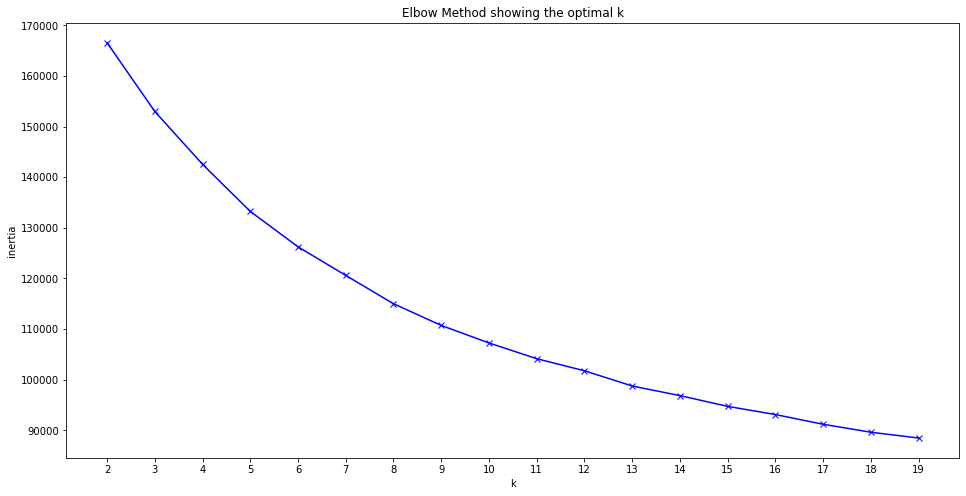

In [11]:
K = range(2, 20)
inertia = []

for k in tqdm(K,desc='Inertia'):
    kmeans = KMeans(n_clusters=k,
                    random_state=1337)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Silhouette: 100%|██████████| 18/18 [02:09<00:00,  7.18s/it]


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

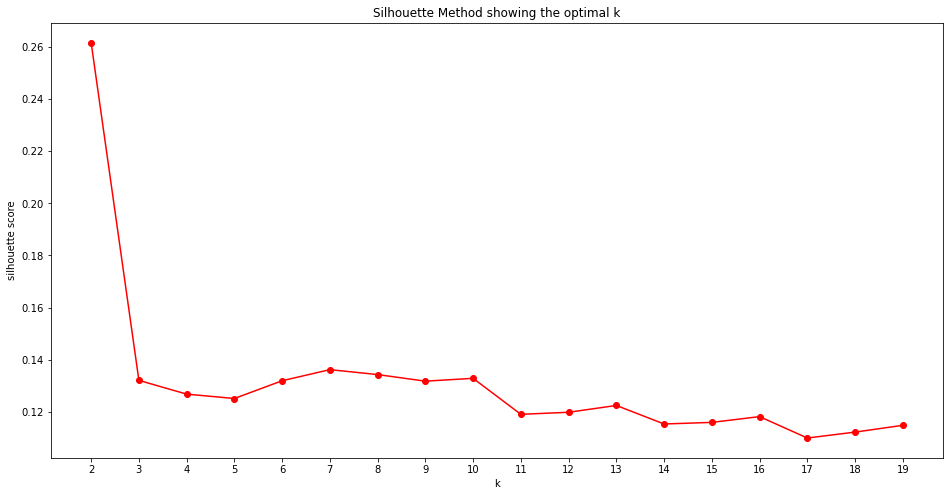

In [12]:
K = range(2, 20)
silhouette = []

for k in tqdm(K,desc='Silhouette'):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'ro-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

I'm taking 10 clusters (the code, again):

In [13]:
kmeans = cluster.KMeans(n_clusters=10) 
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)

In [14]:
df = df.dropna()
df = df.drop(["Unnamed: 0"], axis= 1)

In [15]:
C = pd.Series(kmeans.predict(X_prep))

data = pd.concat([df,C], axis = 1)
data = data.rename(columns={0: 'cluster'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# data.to_csv('clustered_spotify_data.csv', index=False)

In [21]:
cluster_df = data

# Gnod:

In [19]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [38]:
df = pd.read_csv("spotify_data.csv")
top_df = pd.read_csv("top_songs.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import random

In [40]:
def getFeatures(art_name, track_name):
    take_song= sp.search(q='artist:' + art_name + 'track:' + track_name, type='track')
    uri = take_song["tracks"]["items"][0]["id"]
    features = sp.audio_features(uri)
    return features


song = input("Search song title: ").lower()
artist = input("Search artist name: ").lower()
searched = sp.search(q=song, type='track')
response = searched["tracks"]["total"] 

while response == 0:
    print("Sorry, we can't find that song: ")
    #Try again
    song = input("Try again. Search song title: ").lower()
    artist = input("Search artist name: ").lower()
    #New search
    searched = sp.search(q=song, type='track')
    response = searched["tracks"]["total"]


if song in list(top_df['song']):
    print("That song is hot! \n We suggest you listen to another trendy song: " + random.choice(top_df['song']))
    
else:
    #get features of the song
    feature = getFeatures(artist, song)
    
    list_features = list(feature[0].keys())
    list_values = [list(feature[0].values())]

    features_df = pd.DataFrame(data=list_values, columns = list_features)
    features_df = features_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'],axis=1)
    
    #scale features
    scale_df = scaler.transform(features_df)
    
    #predict the cluster number and compare with our clustered data
    cluster = kmeans.predict(scale_df)
    cluster_number = cluster_df[cluster_df["cluster"] == cluster[0]] 
    
    #recommend
    recommended = random.choice(cluster_number["name"])
    print('You might like this song: ',recommended)


IndexError: list index out of range